# Day 3 AM
## Statistik Inferensi

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.read_excel('https://github.com/fahmimnalfrzki/Additional-Materials/blob/main/online_retail_data.xlsx?raw=true').drop(columns='Unnamed: 0').sort_values('InvoiceDate',ascending=True).reset_index(drop=True)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom
...,...,...,...,...,...,...,...,...
9995,581501,22942,CHRISTMAS LIGHTS 10 SANTAS,12,2011-12-09 10:46:00,2.95,12985.0,United Kingdom
9996,581572,22627,MINT KITCHEN SCALES,4,2011-12-09 12:08:00,8.50,16705.0,United Kingdom
9997,581578,21507,ELEPHANT BIRTHDAY CARD,12,2011-12-09 12:16:00,0.42,12713.0,Germany
9998,581579,23353,6 GIFT TAGS VINTAGE CHRISTMAS,12,2011-12-09 12:19:00,0.83,17581.0,United Kingdom


In [4]:
data['income']=data['Quantity']*data['UnitPrice']

In [5]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,income
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,17.85
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom,12.60
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom,51.00
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom,2.55
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom,16.50
...,...,...,...,...,...,...,...,...,...
9995,581501,22942,CHRISTMAS LIGHTS 10 SANTAS,12,2011-12-09 10:46:00,2.95,12985.0,United Kingdom,35.40
9996,581572,22627,MINT KITCHEN SCALES,4,2011-12-09 12:08:00,8.50,16705.0,United Kingdom,34.00
9997,581578,21507,ELEPHANT BIRTHDAY CARD,12,2011-12-09 12:16:00,0.42,12713.0,Germany,5.04
9998,581579,23353,6 GIFT TAGS VINTAGE CHRISTMAS,12,2011-12-09 12:19:00,0.83,17581.0,United Kingdom,9.96


In [6]:
data['date'] = data['InvoiceDate'].dt.date

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    10000 non-null  object        
 1   StockCode    10000 non-null  object        
 2   Description  9965 non-null   object        
 3   Quantity     10000 non-null  int64         
 4   InvoiceDate  10000 non-null  datetime64[ns]
 5   UnitPrice    10000 non-null  float64       
 6   CustomerID   7499 non-null   float64       
 7   Country      10000 non-null  object        
 8   income       10000 non-null  float64       
 9   date         10000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 781.4+ KB


In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,income,date
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,17.85,2010-12-01
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom,12.60,2010-12-01
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom,51.00,2010-12-01
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom,2.55,2010-12-01
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom,16.50,2010-12-01


In [9]:
daily_income = data[['date','income']].groupby('date').sum()

In [10]:
daily_income.income.mean()

579.6823606557376

In [11]:
np.round(daily_income.income.mean())

580.0

In [12]:
t_stat, p_val = stats.ttest_1samp(daily_income['income'],500)


In [13]:
t_stat

2.781482852334568

In [14]:
p_val/2

0.0028745490601192387

In [15]:
daily_income_pop = np.random.normal(daily_income['income'].mean(), daily_income['income'].std(),10000)

In [16]:
daily_income['income'].std()

500.306015510758

In [17]:
daily_income_pop.std()

502.84285635341945

In [18]:
ci = stats.norm.interval(0.90, daily_income['income'].mean(), daily_income['income'].std())

In [19]:
ci

(-243.24780354277254, 1402.6125248542476)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\TIP-CRB-08\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


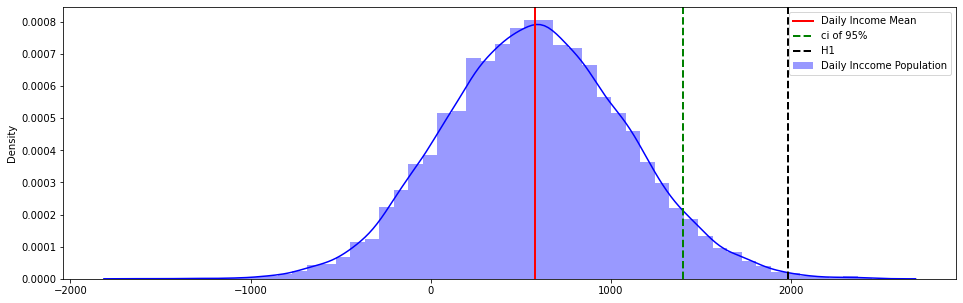

In [21]:
plt.figure(figsize=(16,5))
sns.distplot(daily_income_pop, label='Daily Inccome Population', color = 'blue')
plt. axvline(daily_income['income'].mean(), color = 'red', linewidth=2, label='Daily Income Mean')
plt. axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='ci of 95%')
plt.axvline(daily_income_pop.mean() + t_stat*daily_income_pop.std(),color='black',linestyle='dashed', linewidth=2, label='H1')
plt.legend()